##### Micro-Credit Defaulter Model - Vinayak Ratan

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Data Trained\Internship Fliprobo Technologies\Micro Credit Project\Data file.csv', index_col= 'Unnamed: 0' )
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
# Top five rows of data
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
# Bottom five rows of the data
df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
# To display all the columns
pd.set_option('display.max_columns', None)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
# Shape of the dataset
df.shape

(209593, 36)

### Exploratory Data Analysis

##### Basic information of data

In [7]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

- One can see that there are only three object data type features - msisdn, pcircle, pdate

In [9]:
# Checking the presence of null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

- There are no null values present in the data

##### Summary Statistics

In [10]:
# For numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [11]:
# for object data type features
df.describe(include='object').T

,count,unique,top,freq
msisdn,209593,186243,04581I85330,7
pcircle,209593,1,UPW,209593
pdate,209593,82,2016-07-04,3150


- Mean is greater than median for all the columns, hence data is right skewed
- There are outliers present in the dataset when we look at the large difference b/w 75th percentile and maximum, hence the outliers must be treated properly
- since the dataset contains columns with 90days, hence we can see that from pdate column the data is only for three months 
- msidn is a mobile number of user and mobile number is unique for each customers. There are 186243 unique number out of 209593, rest are duplicates, hence must be removed
- pcircle column contains only one unique value, hence this can be dropped 

In [12]:
# removing duplicates from msisdn
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 36)

- Now, we can see that the data size reduced from 209593 to 186243

##### Count plot for categorical features

UPW    186243
Name: pcircle, dtype: int64


(array([0]), [Text(0, 0, 'UPW')])

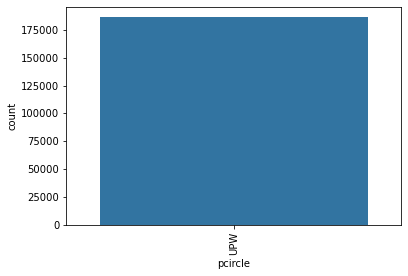

In [13]:
print(df['pcircle'].value_counts())
sns.countplot(x = 'pcircle', data = df)
plt.xticks(rotation = 'vertical')

In [14]:
df.drop('pcircle', axis = 1)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,5.200000,5.200000,2016-07-04
209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,3178,3,3.0,12143.0,3178.0,914.00,5,17,14455,3178.0,28.00,0.0,0.0,0,0,1,12,12.0,1.0,3.0,24,12,1.0,0.000000,30.000000,2016-08-02
209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


1    160383
0     25860
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

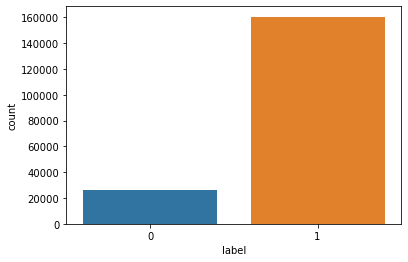

In [15]:
print(df['label'].value_counts())
sns.countplot(x = 'label', data = df)

- 'Label' is the target variable wherein '1' indicates loan payed back (Non - defaulter) and '0' indicates loan has not payed back (Defaulter)
- We can see data is not balanced, so we need to balance the data before model building

1     35382
2     28911
0     27045
3     23058
4     17815
      ...  
84        1
53        1
59        1
74        1
55        1
Name: cnt_ma_rech30, Length: 62, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  T

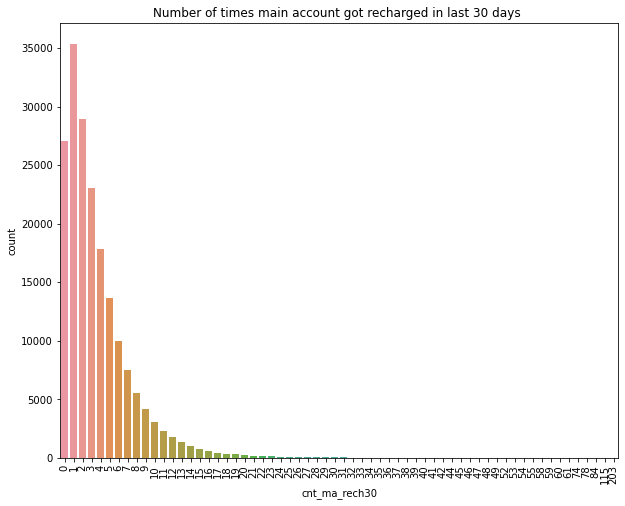

In [16]:
# Plot for Number of times main account got recharged in last 30 days 
plt.figure(figsize = (10,8))
print(df['cnt_ma_rech30'].value_counts())
sns.countplot(x = 'cnt_ma_rech30', data = df)
plt.title("Number of times main account got recharged in last 30 days ")
plt.xticks(rotation = 'vertical')

- We can see that the times account got recharged in last 30 days in maximum 1 time. Many recharge less than 10 times every month

1      26665
2      22520
0      20249
3      18858
4      15733
       ...  
127        1
336        1
91         1
81         1
87         1
Name: cnt_ma_rech90, Length: 99, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(

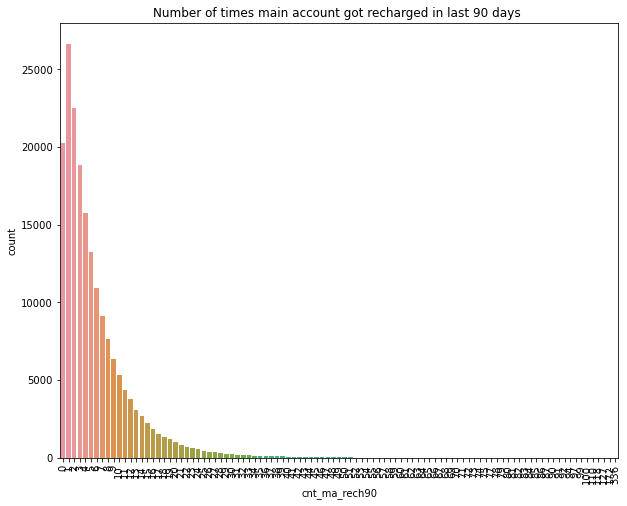

In [17]:
# Plot for Number of times main account got recharged in last 90 days 
plt.figure(figsize = (10,8))
print(df['cnt_ma_rech90'].value_counts())
sns.countplot(x = 'cnt_ma_rech90', data = df)
plt.title("Number of times main account got recharged in last 90 days ")
plt.xticks(rotation = 'vertical')

- We can see that the times account got recharged in last 90 days in maximum 1 time. Many recharge less than 20 times for three months

In [18]:
num = df.select_dtypes(include=['int64', 'float64']).columns

In [19]:
num

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [20]:
for i in num:
    print(f'Unique values in {i} are: {df[i].nunique()}')
    print(20*'-')
    print('\n')

Unique values in label are: 2
--------------------


Unique values in aon are: 4282
--------------------


Unique values in daily_decr30 are: 130323
--------------------


Unique values in daily_decr90 are: 139842
--------------------


Unique values in rental30 are: 117881
--------------------


Unique values in rental90 are: 125595
--------------------


Unique values in last_rech_date_ma are: 1061
--------------------


Unique values in last_rech_date_da are: 1061
--------------------


Unique values in last_rech_amt_ma are: 70
--------------------


Unique values in cnt_ma_rech30 are: 62
--------------------


Unique values in fr_ma_rech30 are: 961
--------------------


Unique values in sumamnt_ma_rech30 are: 13130
--------------------


Unique values in medianamnt_ma_rech30 are: 501
--------------------


Unique values in medianmarechprebal30 are: 28486
--------------------


Unique values in cnt_ma_rech90 are: 99
--------------------


Unique values in fr_ma_rech90 are: 89
-----

##### Correlation

In [21]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,0.001129,0.207727,0.149780,-0.004835,0.245941,0.094709,0.212666,0.129527,0.041728,0.004184,-0.000137,0.003601,-0.005779,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,-0.000436,-0.000397,0.004446,0.004221,-0.003957,0.005517,0.000160,0.005022,-0.001128,0.002445,0.000806,0.000868,0.006379,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,0.000766,0.630202,0.307440,-0.000854,0.576787,-0.061858,0.754042,0.269721,0.042276,0.000312,-0.002442,0.038944,0.019874,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,0.001091,0.597542,0.294838,-0.000688,0.582115,-0.063740,0.759865,0.262627,0.041210,-0.000128,-0.002189,0.031408,0.015944,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,0.000272,0.258656,0.132083,-0.001112,0.295746,-0.022353,0.324302,0.113115,0.029945,-0.001286,-0.001917,0.073169,0.047579,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,0.001057,0.246626,0.122747,-0.001047,0.329330,-0.024882,0.342772,0.106832,0.032886,-0.001307,-0.001997,0.057332,0.037829,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,-0.001165,0.002544,-0.002716,0.004216,0.006131,0.000881,0.002345,-0.001947,-0.001506,-0.003344,-0.003469,-0.003700,-0.002232,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,0.000958,0.000080,0.000184,0.003673,0.001924,0.001071,-0.000296,-0.000321,0.004731,-0.003807,0.000455,-0.001229,0.000210,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,0.002998,0.456707,0.796969,-0.002597,0.028202,0.109126,0.436776,0.824654,0.125195,-0.002644,-0.003196,0.015274,0.016371,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,0.002295,0.646356,0.002987,0.000556,0.884131,-0.130383,0.572447,-0.039974,0.018759,0.003369,-0.000292,0.011810,0.005453,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


<AxesSubplot:>

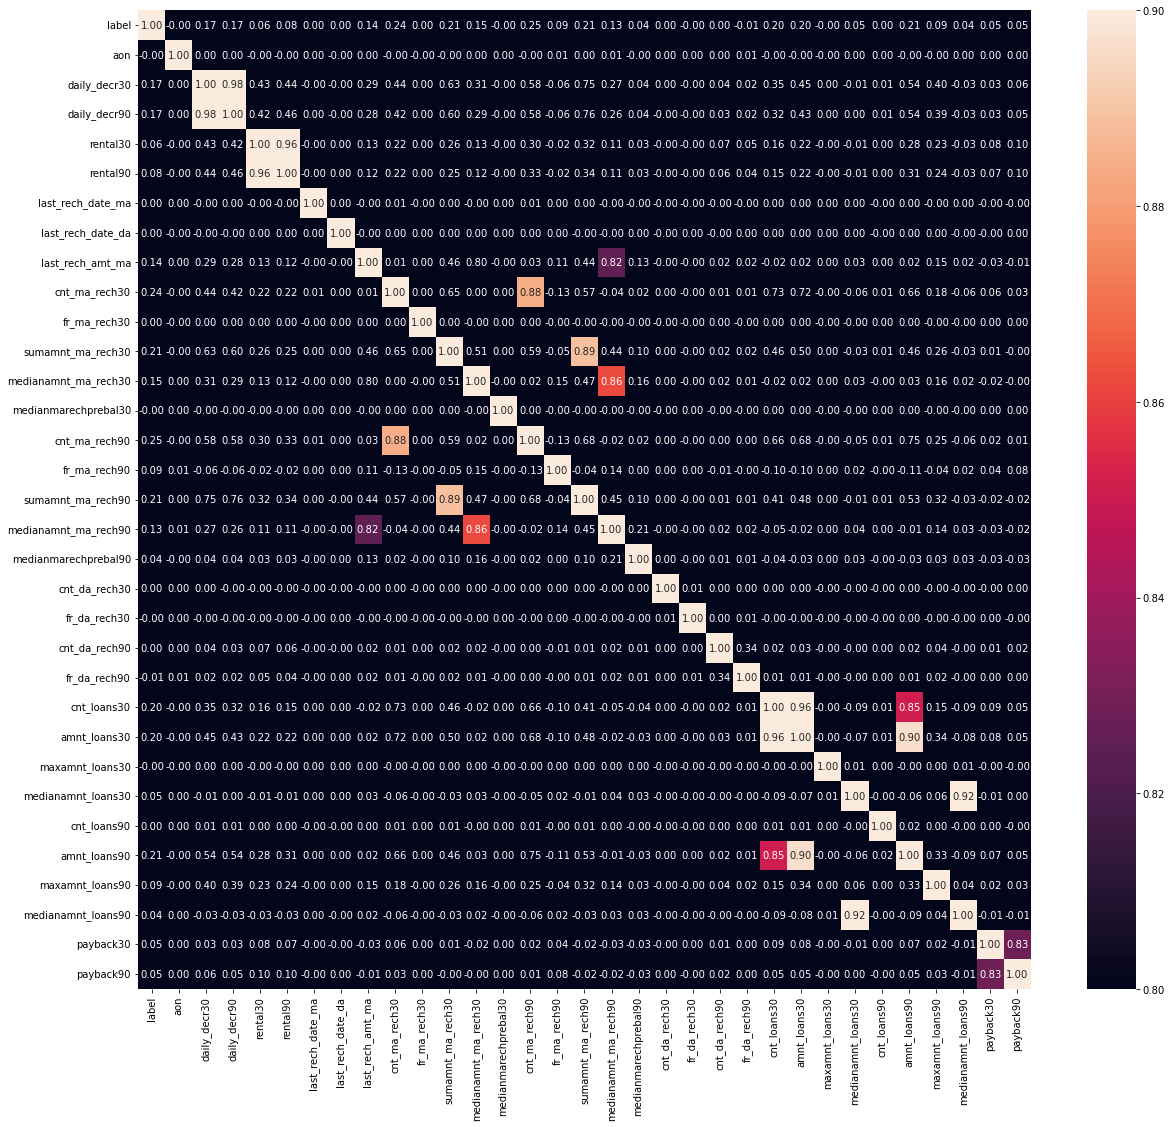

In [22]:
# heatmap for correlation
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), annot =True, fmt = '0.2f', vmin = 0.8, vmax = 0.9)

- We can see that many features are highly correlated with each other, which means there is multicollinearity in the data
- One can see that features with 30days and 90 days are highly correlated with each other. 
- Also features with 30days and 90days specifically are highly correlated.
- We can think of dropping the few features related to 30days like daily_decr30,rental30,amnt_loans30,medianamnt_loans30, cnt_ma_rech30. More specifically before we drop the features we will check the variance inflation factor and then drop the features based on the both vif and correlation

In [23]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Text(0.5, 1.0, 'Correlation with target variable')

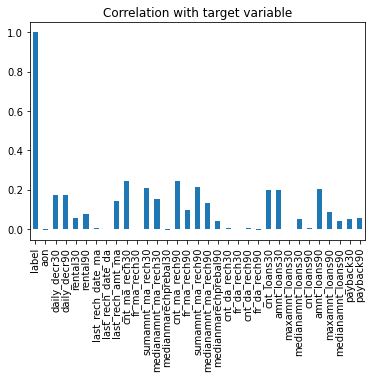

In [38]:
df.corrwith(df['label']).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable")

<AxesSubplot:xlabel='fr_da_rech90', ylabel='payback90'>

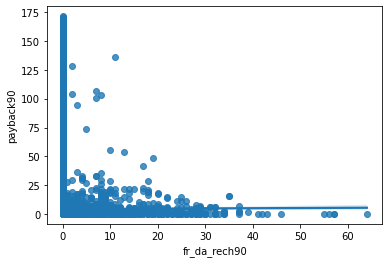

In [47]:
sns.regplot(x ='fr_da_rech90' ,y = 'payback90', data = df)

<AxesSubplot:xlabel='fr_da_rech30', ylabel='payback30'>

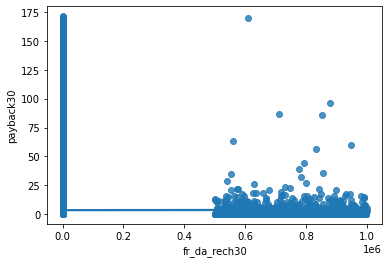

In [48]:
sns.regplot(x ='fr_da_rech30' ,y = 'payback30', data = df)

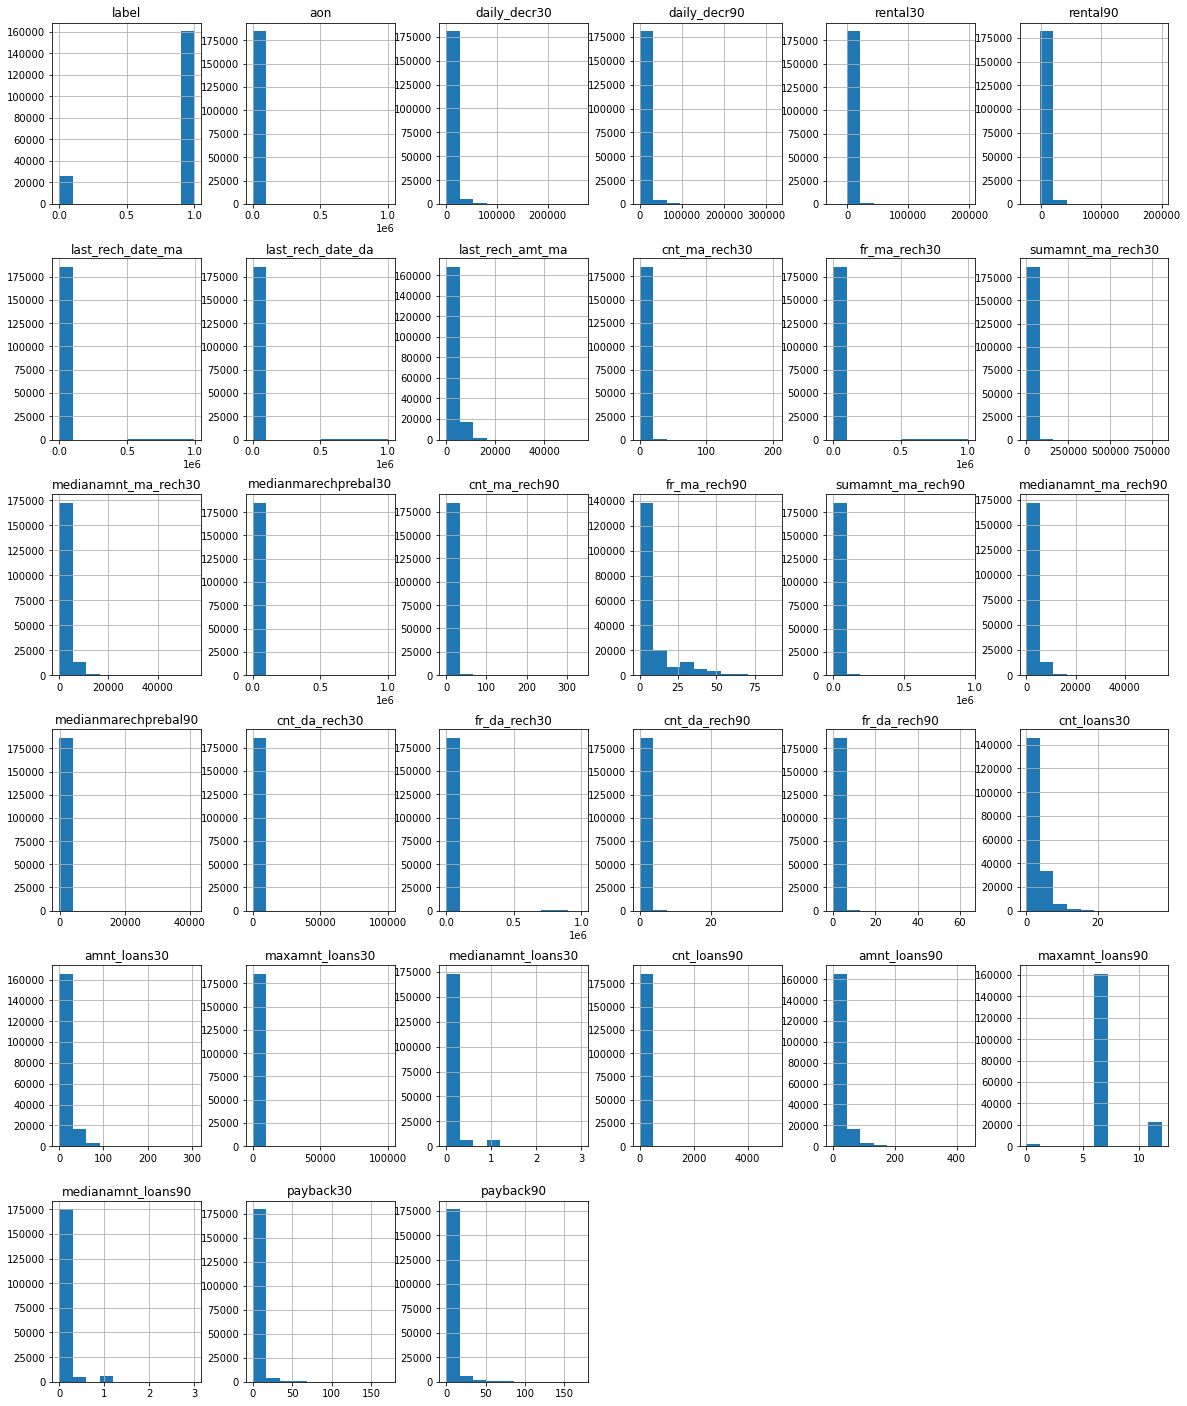

In [51]:
df.hist(figsize=(20,25))
plt.show()

- Taller bars show most of the data lies in that range, where most of the range is at the start

<AxesSubplot:xlabel='pdate', ylabel='count'>

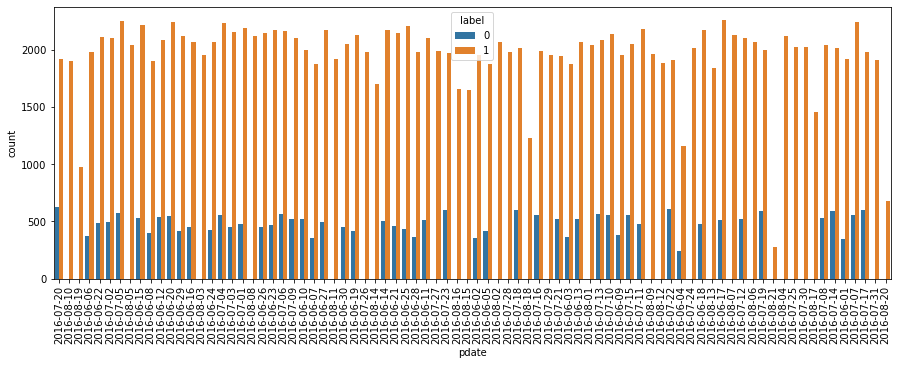

In [60]:
plt.figure(figsize = (15,5))
plt.xticks(rotation='vertical')
sns.countplot(x="pdate", hue='label', data=df)

In [61]:
df['Month'] = pd.DatetimeIndex(df['pdate']).month
df['Date'] = pd.DatetimeIndex(df['pdate']).day
df['Year'] = pd.DatetimeIndex(df['pdate']).year

In [62]:
df.sample()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Month,Date,Year
53622,1,89441I84459,-48.0,2.323333,2.323333,127.23,127.23,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.0,0.0,UPW,2016-06-01,6,1,2016


In [63]:
df.drop(['msisdn','pcircle','pdate'], axis = 1, inplace = True)

In [64]:
df.sample()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date,Year
10200,1,1032.0,60.81,60.81,469.5,469.5,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,2,12,6.0,0.5,2.0,12,6,0.5,0.0,0.0,6,30,2016


<AxesSubplot:xlabel='Date', ylabel='count'>

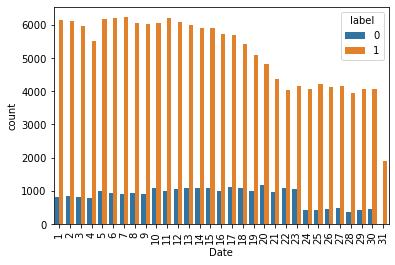

In [67]:
# Checking defaulter and non-defaulters w.r.t. date
plt.xticks(rotation='vertical')
sns.countplot(x="Date", hue='label', data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

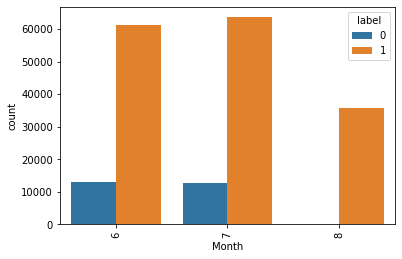

In [68]:
# Checking defaulter and non-defaulters w.r.t. month
plt.xticks(rotation='vertical')
sns.countplot(x="Month", hue='label', data=df)

<AxesSubplot:xlabel='Year', ylabel='count'>

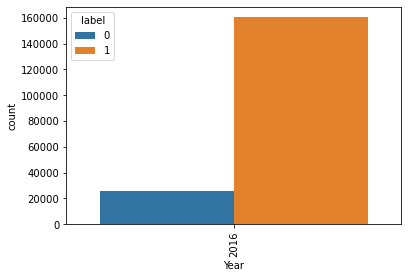

In [70]:
# Checking defaulter and non-defaulters w.r.t. year
plt.xticks(rotation='vertical')
sns.countplot(x="Year", hue='label', data=df)

- Only 3 months date, so only year which we can drop

In [71]:
df.drop('Year', axis = 1, inplace = True)

In [72]:
df.shape

(186243, 35)

##### Checking for Outliers

In [73]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
1,2.490376,0.103778,0.227755,0.254478,0.562600,0.549119,0.069337,0.069692,0.221118,0.420476,0.069066,0.425651,0.132452,0.071695,0.574551,1.029186,0.531687,0.160409,0.222810,0.062862,0.069772,0.104109,0.047757,0.227049,0.282461,0.062992,0.252013,0.071299,0.397821,0.322874,0.234897,2.835793,2.323253,0.280763,0.666507
2,0.401546,0.097978,0.807466,0.621635,0.246261,0.050676,0.069002,0.069692,1.537218,0.675884,0.069459,0.145666,1.874276,0.070711,0.726969,0.616236,0.362029,1.831781,0.084562,0.062862,0.069772,0.104109,0.047757,0.668224,0.282461,0.061571,0.252013,0.075777,0.397821,2.543336,0.234897,0.370558,0.407507,1.632661,0.519764
3,0.401546,0.100311,0.416949,0.415701,0.404143,0.437240,0.069318,0.069692,0.221118,0.675884,0.069459,0.584711,0.132452,0.070614,0.726969,0.616236,0.628071,0.160409,0.070929,0.062862,0.069772,0.104109,0.047757,0.668224,0.670855,0.062992,0.252013,0.075777,0.656555,0.322874,0.234897,0.370558,0.407507,1.632661,0.547880
4,0.401546,0.104187,0.574142,0.548842,0.576747,0.566724,0.068611,0.069692,0.466159,0.931292,0.069459,0.743772,0.859466,0.071832,0.726969,0.616236,0.665146,0.438040,0.235721,0.062862,0.069772,0.104109,0.047757,0.227049,0.282461,0.062992,0.252013,0.071299,0.397821,0.322874,0.234897,0.370558,0.407507,1.071136,0.994273
5,0.401546,0.094881,0.559369,0.536329,0.357824,0.402494,0.069300,0.069692,0.097601,0.856562,0.069422,1.326291,0.231291,0.071300,0.339957,0.459529,0.747041,0.472233,0.151801,0.062862,0.069772,0.104109,0.047757,1.978829,1.659509,0.062992,0.252013,0.048910,0.895846,0.322874,0.234897,0.112576,0.187791,1.071136,0.903761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209586,0.401546,0.096910,0.034307,0.032920,0.475292,0.482679,0.069337,0.069692,0.097601,0.090339,0.069160,0.051635,0.049420,0.071208,0.269715,0.637419,0.242473,0.020145,0.154383,0.062862,0.069772,0.104109,0.047757,1.096478,0.882721,0.062992,0.252013,0.057866,0.378379,0.322874,0.234897,0.204374,0.082146,0.280763,1.231527
209588,0.401546,0.104213,1.099298,0.871150,2.400346,2.337946,0.069225,0.069692,0.457299,0.165069,0.069403,0.511247,0.641801,0.055039,0.117297,0.715772,0.180826,0.608235,0.169876,0.062862,0.069772,0.104109,0.047757,0.668224,0.282461,0.061571,4.240084,0.066821,0.119646,2.543336,4.632473,0.370558,2.417417,1.632661,1.468781
209589,0.401546,0.102038,0.559226,0.536208,0.360087,0.404191,0.069356,0.069692,0.817410,0.165069,0.069422,0.331516,0.641801,0.070146,0.422133,0.459529,0.072878,0.608235,0.005110,0.062862,0.069772,0.104109,0.047757,0.227049,0.282461,0.062992,0.252013,0.071299,0.397821,0.322874,0.234897,0.259994,0.313343,1.071136,0.310626
209592,0.401546,0.084533,0.849280,0.665116,0.517929,0.422478,0.069337,0.068983,0.538181,0.345746,0.069384,0.512384,0.494306,0.068819,0.035121,0.302823,0.399145,0.248299,0.016038,0.062862,0.069772,2.401339,0.047757,0.227049,0.105933,0.061571,0.252013,0.066821,0.119646,2.543336,0.234897,0.370558,0.581216,0.280763,1.259643


In [74]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([    21,     22,     22, ..., 186234, 186239, 186239], dtype=int64),
 array([15, 15, 32, ...,  3, 26, 30], dtype=int64))

In [75]:
z.shape

(186243, 35)

In [76]:
# Removing the rows with z score greater than 3
df_new = df[(z<3).all(axis=1)]
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,0,945.0,0.000000,0.000000,78.30,78.30,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6,6
209586,1,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,2309,4,16.0,7696.0,1924.0,34.00,4,16,7696,1924.0,34.00,0.0,0.0,0,0,5,30,6.0,0.0,5.0,30,6,0.0,5.200000,5.200000,7,4
209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [77]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", df.shape)
print("New DataFrame:-",df_new.shape)
print('Total dropped rows:-', df.shape[0]-df_new.shape[0])

Old DataFrame:- (186243, 35)
New DataFrame:- (143188, 35)
Total dropped rows:- 43055


In [78]:
# Percentage loss of data
loss_percent = (186243-143188)/143188*100
print(loss_percent,'%')

30.06886051903791 %


- Almost 30% of the data will we lost, hence we will not remove the outliers.We will use the old dataframe

##### Checking for skewness

In [79]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr30             4.003019
daily_decr90             4.301490
rental30                 4.676793
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
amnt_loans30             3.006644
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans9

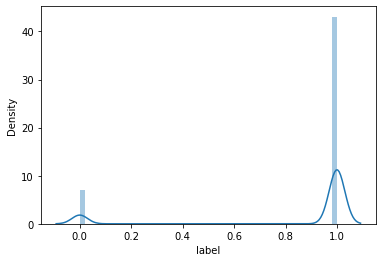

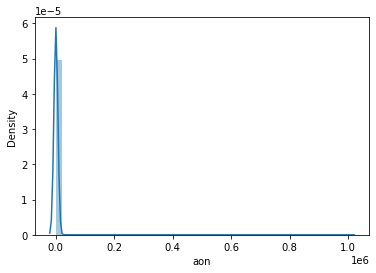

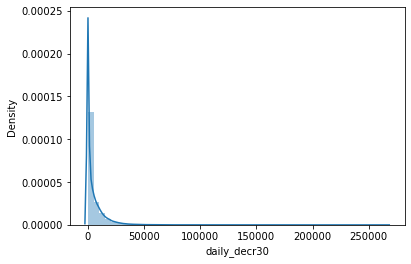

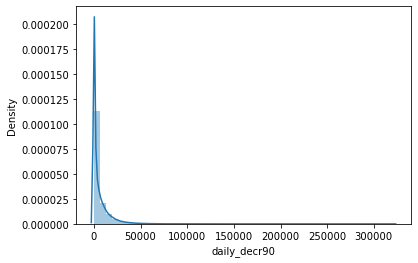

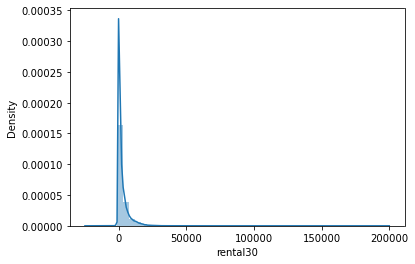

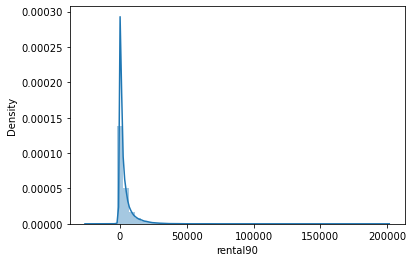

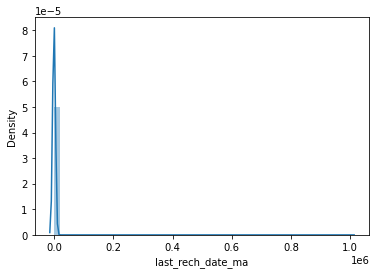

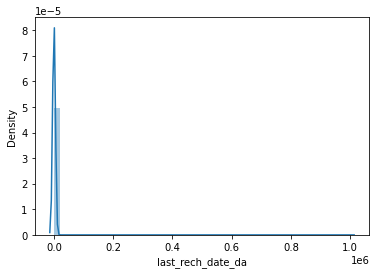

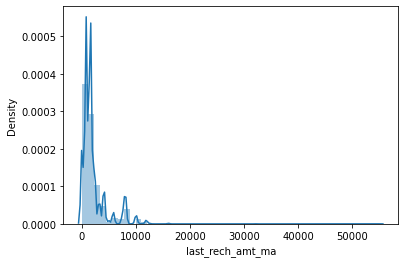

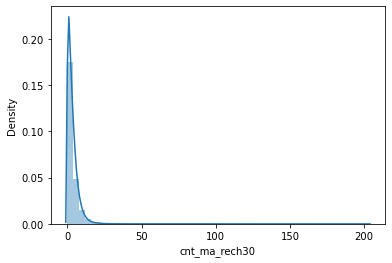

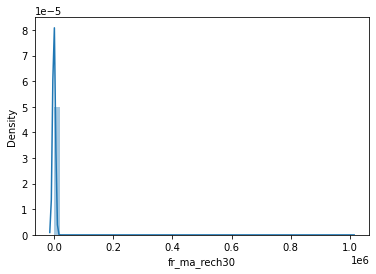

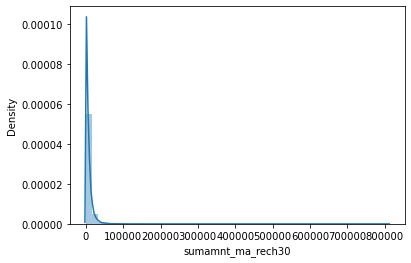

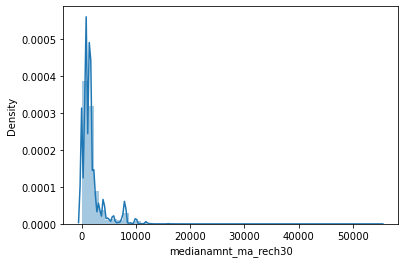

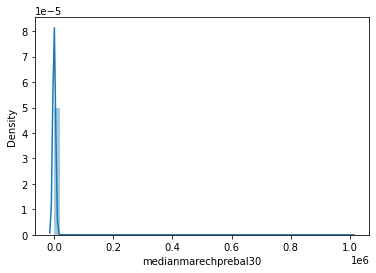

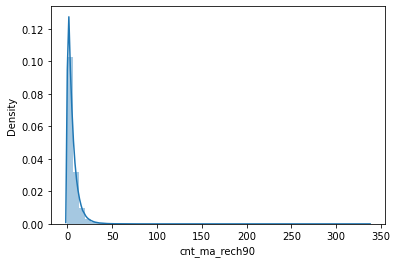

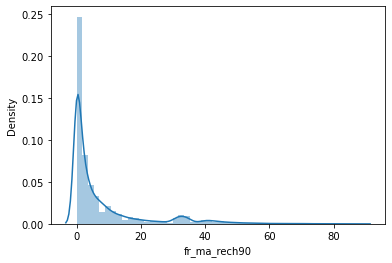

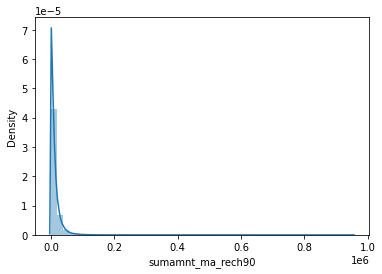

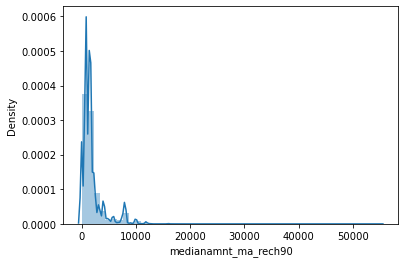

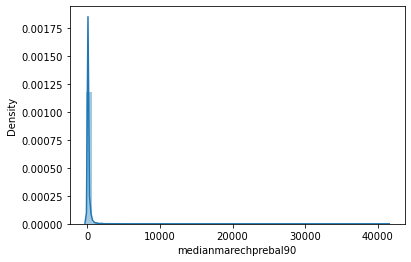

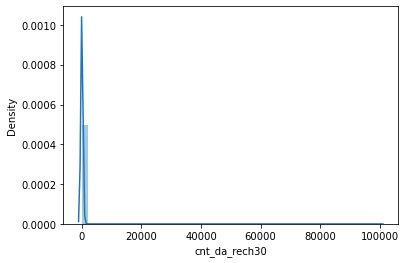

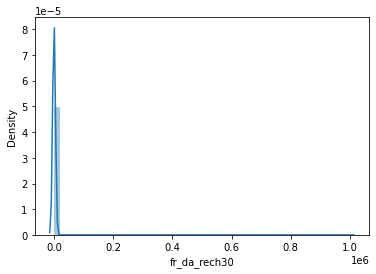

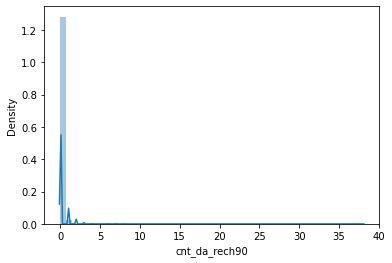

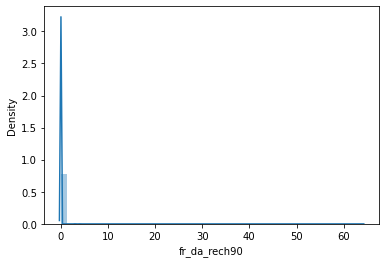

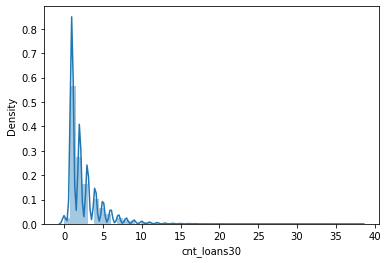

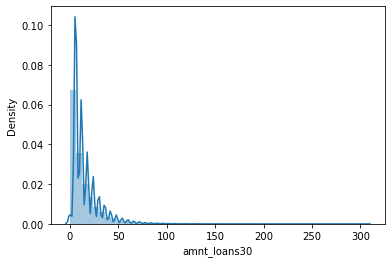

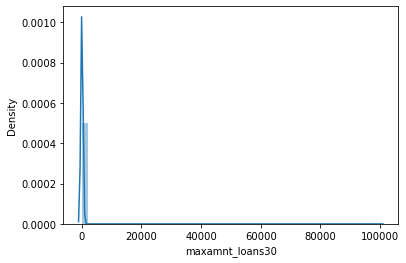

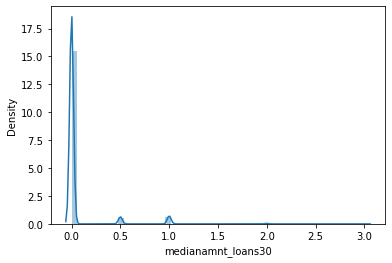

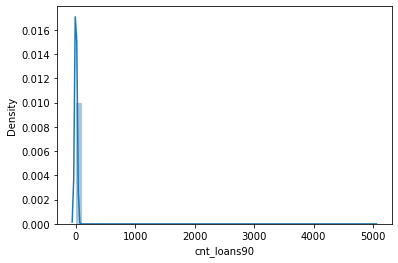

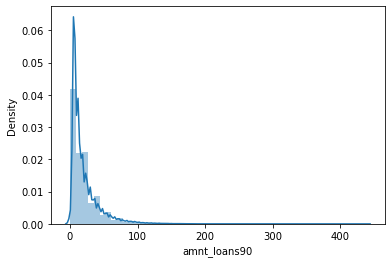

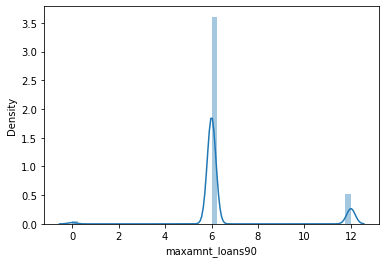

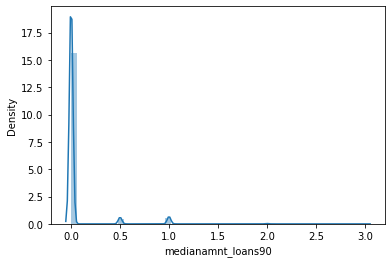

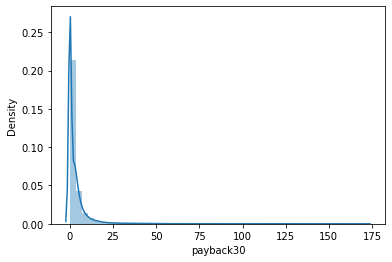

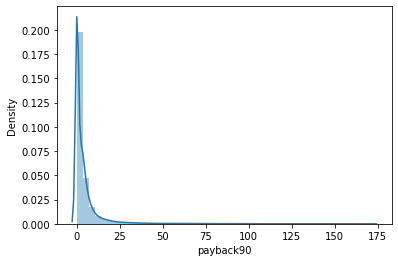

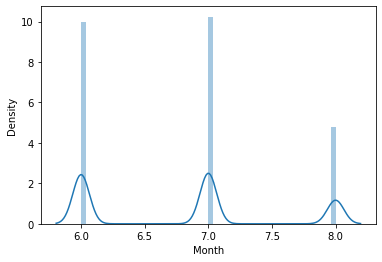

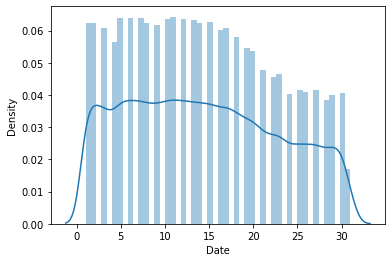

In [85]:
# Let's plot distribution plot
for j in df.describe().columns:
    sns.distplot(df[j])
    plt.show()

- One can see that most of the data is left skewed

##### Splitting the data into X and y

In [87]:
X = df.iloc[:,1:]
X.sample()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
85947,1415.0,2530.0,2531.0,9021.57,21404.32,1.0,0.0,2309,2,16.0,3848.0,1924.0,393.97,3,20,13848,2309.0,104.47,0.0,0.0,0,0,1,12,12.0,1.0,1.0,12,12,1.0,0.0,0.0,8,8


In [90]:
y = df.iloc[:,0]
y.sample()

66699    1
Name: label, dtype: int64

##### Checking variance inflation factor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features names']=X.columns
    print(vif)

In [89]:
vif_calc()

    VIF_Factor        features names
0     1.011639                   aon
1    38.505580          daily_decr30
2    41.374473          daily_decr90
3    17.994700              rental30
4    18.590799              rental90
5     1.004998     last_rech_date_ma
6     1.004982     last_rech_date_da
7     6.145754      last_rech_amt_ma
8    25.703053         cnt_ma_rech30
9     1.004950          fr_ma_rech30
10   19.172385     sumamnt_ma_rech30
11    8.760901  medianamnt_ma_rech30
12    1.005289  medianmarechprebal30
13   26.493158         cnt_ma_rech90
14    1.468663          fr_ma_rech90
15   22.311208     sumamnt_ma_rech90
16   10.116424  medianamnt_ma_rech90
17    1.129997  medianmarechprebal90
18    1.004168         cnt_da_rech30
19    1.005058          fr_da_rech30
20    1.156764         cnt_da_rech90
21    1.138361          fr_da_rech90
22   50.236853           cnt_loans30
23   61.545832          amnt_loans30
24    1.004309       maxamnt_loans30
25    6.669063    medianamnt_loans30
2

- We will not drop any feature

### Model Building

#### SMOTE for imbalance

In [93]:
# Before proceeding with model building we need to apply SMOTE since the data is imbalanced
from imblearn.over_sampling import SMOTE
smt_loan = SMOTE()
train_x, train_y = smt_loan.fit_resample(X,y)

In [94]:
train_y.value_counts()

0    160383
1    160383
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

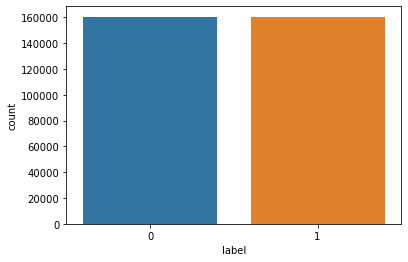

In [95]:
sns.countplot(data = train_y, x = train_y)

- Since the target variable was not balanced. Now it is balanced once we apply SMOTE as above

In [96]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [97]:
lg = LogisticRegression()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

model = [lg, gnb, dtc, knn]

In [98]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0
for m in model:
    for i in range(0,10):
        x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=i)
        m.fit(x_train, y_train)
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_train, y_train)
        pred = m.predict(x_test)
        print(f'----------------At random State {i} ------------------')
        acc = accuracy_score(y_test, pred)
        print("Accuracy score of ", m, 'is:', acc)
        print(f'Training score of {m} is {train_score}')
        print(f'Testing score of {m} is {test_score}')
        print('\n')
    
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i
            print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")
            print('\n')
    print('*'*120)

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is: 0.7260654051189326
Training score of LogisticRegression() is 0.7291280220722336
Testing score of LogisticRegression() is 0.7291280220722336


Maximum accuracy score of LogisticRegression() is 0.7260654051189326 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is: 0.729120553667737
Training score of LogisticRegression() is 0.7307296619020155
Testing score of LogisticRegression() is 0.7307296619020155


Maximum accuracy score of LogisticRegression() is 0.729120553667737 at Random state 1


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is: 0.727780029304486
Training score of LogisticRegression() is 0.7288318550964101
Testing score of LogisticRegression() is 0.7288318550964101


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is: 0.729993453

KeyboardInterrupt: 

- Maximum accuracy score of DecisionTreeClassifier() is 0.9036225332792966 at Random state 8
- considering Decision Tree classifier for further process

In [99]:
x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=8)
dtc.fit(x_train, y_train)
train_score = dtc.score(x_train, y_train)
test_score = dtc.score(x_train, y_train)
pred = dtc.predict(x_test)
print(f'--------------------- {dtc} ----------------------')
acc = accuracy_score(y_test, pred)
print("Accuracy score of ", dtc, 'is:', acc)
print(f'Training score of {dtc} is {train_score}')
print(f'Testing score of {dtc} is {test_score}')
print("Confusion Matrix:\n",confusion_matrix(y_test, pred))
print('Classification Report:\n',classification_report(y_test, pred))
print('*'*120,'\n')

--------------------- DecisionTreeClassifier() ----------------------
Accuracy score of  DecisionTreeClassifier() is: 0.9032328459643981
Training score of DecisionTreeClassifier() is 0.9999961030661075
Testing score of DecisionTreeClassifier() is 0.9999961030661075
Confusion Matrix:
 [[29117  2840]
 [ 3368 28829]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     31957
           1       0.91      0.90      0.90     32197

    accuracy                           0.90     64154
   macro avg       0.90      0.90      0.90     64154
weighted avg       0.90      0.90      0.90     64154

************************************************************************************************************************ 



- The model is predicting well

##### Hyper Parameter Tunning

In [100]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_dtc = {'max_depth': [5, 10],'min_samples_leaf': [5, 10],'criterion': ["gini", "entropy"]}

gcv_dtc = GridSearchCV(dtc,param_dtc,cv=2,scoring= 'accuracy')

# training
gcv_dtc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_dtc.best_params_)

print("Best Estimator:",gcv_dtc.best_estimator_)

gcv_dtc_pred=gcv_dtc.best_estimator_.predict(x_test)

print('Final Accuracy with Decision Tree Classifier:', accuracy_score(y_test,gcv_dtc_pred))

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
Best Estimator: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
Final Accuracy with Decision Tree Classifier: 0.8815506437634442


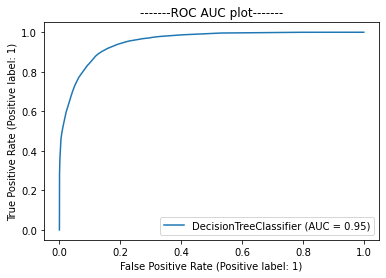

In [104]:
# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_dtc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

### Pickling

In [105]:
# Pickling of the file or serialization of a file
# Decision Tree Classifier
import joblib
joblib.dump(gcv_dtc.best_estimator_,"Micro_credit_defaulter.pkl")

['Micro_credit_defaulter.pkl']

In [106]:
mcd_model = joblib.load('Micro_credit_defaulter.pkl')
mcd_result = mcd_model.score(x_test, y_test)
print(mcd_result*100)

88.15506437634441


In [107]:
mcd_conclusion = pd.DataFrame([mcd_model.predict(x_test),y_test], index=['Predicted', 'Original'])
mcd_conclusion.T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
64149,0,0
64150,0,0
64151,0,0
64152,0,0


In [108]:
mcd_conclusion.T[['Predicted', 'Original']].value_counts()

Predicted  Original
1          1           28709
0          0           27846
1          0            4111
0          1            3488
dtype: int64

###### We can see that model is predicting well 
###### Out of 64154  test data model is predicting accurately on 28709+27846 = 56,555 occasions and wrong on 4111+3488 = 7,599 occasions

##### Thank You